MECANUM WHEEL

In [14]:
r = 0.0635
lx = 0.300
ly = 0.300
vel_x = 0.0
vel_y = 0.0
vel_z = 0.1

In [15]:
def calculate_w(r,lx,ly,vel_x,vel_y,vel_z):
    global w_fl,w_fr,w_rl,w_rr,dir1,dir2,dir3,dir4
    w_fl = (vel_x-vel_y-(lx+ly)*vel_z)/r
    w_fr = (vel_x+vel_y+(lx+ly)*vel_z)/r
    w_rl = (vel_x+vel_y-(lx+ly)*vel_z)/r
    w_rr = (vel_x-vel_y+(lx+ly)*vel_z)/r 

    dir1 = w_fl/abs(w_fl)
    dir2 = w_fr/abs(w_fr)
    dir3 = w_rl/abs(w_rl)
    dir4 = w_rr/abs(w_rr)

In [16]:
calculate_w(r,lx,ly,vel_x,vel_y,vel_z)
print("wheel-fl--> "+str(round(w_fl,2))+"--> "+str(dir1))
print("wheel-fr--> "+str(round(w_fr,2))+"--> "+str(dir2))
print("wheel-rl--> "+str(round(w_rl,2))+"--> "+str(dir3))
print("wheel-rr--> "+str(round(w_rr,2))+"--> "+str(dir4))

wheel-fl--> -0.94--> -1.0
wheel-fr--> 0.94--> 1.0
wheel-rl--> -0.94--> -1.0
wheel-rr--> 0.94--> 1.0


PID Control

In [17]:
def find_stable(lst,condition):
    return [i for i,elem in enumerate(lst) if condition(elem)]

In [22]:
def vel_cal(pwm):
    # vel_output = pwm/1250
    # return vel_output
    return pwm/1250

In [1]:
import matplotlib.pyplot as plt
def pid(kp,ki,kd,vel_target,itr):
    err,prv_err,i_err,d_err,vel_act = 0,0,0,0,0
    vel_acts = []
    vel_targets = []
    itrs = []
    errs = []
    outputs = []
    for i in range (itr):
        err  = vel_target - vel_act
        i_err += err
        d_err = err-prv_err
        output = kp*err + ki*i_err + kd*d_err
        vel_act = output/1250

        prv_err = err

        errs.append(err)
        vel_acts.append(vel_act)
        itrs.append(i)
        vel_targets.append(vel_target)
        outputs.append(output)

    ax = plt.subplot()

    ax.plot(vel_acts)
    ax.plot(vel_targets)
    ax.set(xlabel='iteration (times)', ylabel='velocity (m/s)',title='PID Control')
    ax.grid()
    print(vel_acts)
    plt.show()

[0.002, 0.0012000000000000001, 0.0018400000000000003, 0.002, 0.0023456, 0.00260928, 0.002890368, 0.0031508736000000004, 0.003405644800000001, 0.003649496064000001, 0.0038848817152, 0.004111332843520001, 0.004329478201344, 0.004539511906304001, 0.004741777665884159, 0.004936546734112768, 0.005124103074598092, 0.005304711462594806, 0.005478630169250365, 0.005646106640455198, 0.0058073796359766625, 0.0059626788889505485, 0.006112225692558423, 0.006256233116516737, 0.006394906348311367, 0.006528442971208436, 0.0066570332512401395, 0.006780860406217226, 0.00690010086757474, 0.007014924531452715, 0.007125495000882732, 0.0072319698188488555, 0.007334500692774725, 0.007433233710672889, 0.0075283095492963345, 0.007619863674576584, 0.0077080265346385545, 0.007792923745665519, 0.00787467627087954, 0.007953400592892273, 0.008029208879671667, 0.008102209144361114, 0.00817250539917871, 0.008240197803615902, 0.008305382807146724, 0.0083681532866509, 0.00842859867874666, 0.008486805107221806, 0.008542

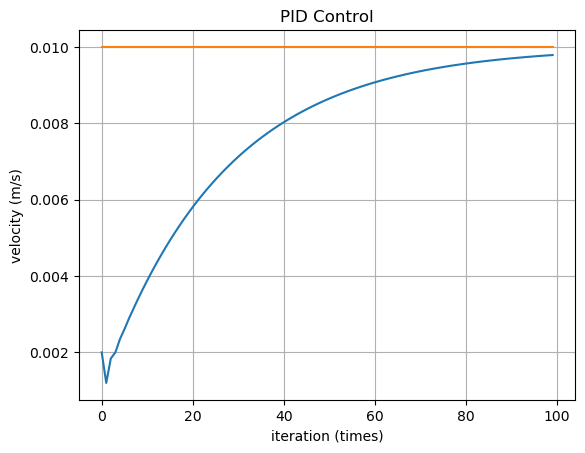

In [5]:
pid(100,50,100,0.01,100)

In [8]:
distance = {}
factor_1 = {1,2,3,4}
factor_2 = {1,2,3,4}
for i in range(0,4):
    distance[i] = 100+i
print(distance[0])

100


In [54]:
a = (1,2)
b = (10,20)
c = ()
# for i in range(0,4):

print(a[0])
print(c)

1


In [ ]:
a = (1,2,3,4,5)
b = (10,20,30,40,50)
c = {100,200,300,400,500}
d = {1000,2000,3000,4000,5000}
print(a)
print(a[0])
print(c)
print(c[0])

/home/mic/.local/lib/python3.8/site-packages/control/xferfcn.py:424: RuntimeWarning: divide by zero encountered in divide
  out[i][j] = (polyval(self.num[i][j], x_arr) /
/home/mic/.local/lib/python3.8/site-packages/control/xferfcn.py:424: RuntimeWarning: invalid value encountered in divide
  out[i][j] = (polyval(self.num[i][j], x_arr) /
/home/mic/.local/lib/python3.8/site-packages/numpy/lib/polynomial.py:779: RuntimeWarning: invalid value encountered in multiply
  y = y * x + pv
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


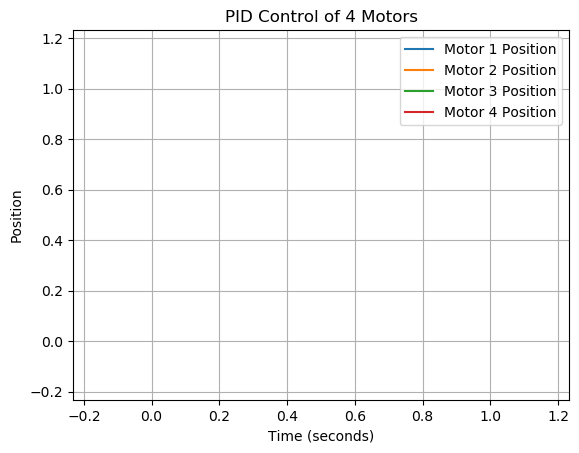

In [2]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# PID parameters
Kp = 1.0
Ki = 0.5
Kd = 0.1

# Simulation parameters
dt = 0.01  # Time step
total_time = 5  # Total simulation time
num_steps = int(total_time / dt)

# Motor parameters
motor_count = 4
motor_targets = [100, 150, 200, 250]  # Target positions for each motor
motor_positions = [0] * motor_count  # Initial positions for each motor
motor_errors = [0] * motor_count  # Errors for each motor

# PID controllers for each motor
pid_controllers = [ctrl.TransferFunction([Kd, Kp, Ki], [1, 0], dt=dt) for _ in range(motor_count)]

# Lists to store the results
motor_outputs = [[] for _ in range(motor_count)]
time_steps = []

# Simulate the system
for step in range(num_steps):
    time_steps.append(step * dt)

    # Calculate control signals for each motor
    motor_controls = [pid_controllers[i](motor_errors[i]) for i in range(motor_count)]

    # Apply control signals and update motor positions
    for i in range(motor_count):
        motor_positions[i] += motor_controls[i]
        motor_outputs[i].append(motor_positions[i])

    # Update motor errors
    motor_errors = [motor_targets[i] - motor_positions[i] for i in range(motor_count)]

# Plot the results
for i in range(motor_count):
    plt.plot(time_steps, motor_outputs[i], label=f"Motor {i+1} Position")

plt.xlabel('Time (seconds)')
plt.ylabel('Position')
plt.title('PID Control of 4 Motors')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
encoder_list = [10,20,30,40]
encoder_prv_list = [5,5,5,5]
enc_0 = encoder_list[0]
enc_1 = encoder_list[1]
enc_2 = encoder_list[2]
enc_3 = encoder_list[3]

In [ ]:
for i in encoder_list:
    if i==0:
        dist_list = [0,0,0,0]
    else:
        for i in range(4):
            dist_list = [encoder_list[i]-encoder_prv_list[i]]

In [6]:
import numpy as np
enc_list = [10,20,30,40]
prv_enc_list = [0,0,0,0]
distance_list= []
tick_0 = 10
tick_1 = 100
elased = 10
for i in range(3):
    dis_f = (np.array(enc_list[0:2])-np.array(prv_enc_list[0:2]))/tick_0
    dis_r = (np.array(enc_list[2:4])-np.array(prv_enc_list[2:4]))/tick_1
    dis = np.concatenate((dis_f,dis_r))
    vel = dis/elased
    print(dis)
    print(np.round(vel,1))

[1.  2.  0.3 0.4]
[0.1 0.2 0.  0. ]
[1.  2.  0.3 0.4]
[0.1 0.2 0.  0. ]
[1.  2.  0.3 0.4]
[0.1 0.2 0.  0. ]


In [24]:
def vel():
    a=5
    return a

In [18]:
def filt():
    print(vel()+10)

In [19]:
filt()

15


In [22]:
aaaa = [1.111,2.22222,3.512]
print(np.round(aaaa,1))

[1.1 2.2 3.5]


In [1]:
z,x,c = 5,4,3
zxc = [z,x,c]
print(zxc)

[5, 4, 3]


In [11]:
vel_list =[0.1,0.1,0.2,0.2]
vel_t_list = [0.3,0.3,0.3,0.3]
kp = 100
err_list = np.array(vel_t_list) - np.array(vel_list)
pwm_list = kp * err_list

print(err_list)
print(pwm_list)

[0.2 0.2 0.1 0.1]
[20. 20. 10. 10.]


In [9]:
v = [10,20,30,0]
pwm = [10,10,10,10]
for i in range(3):
    for i in range(len(v)):
        if v[i] == 0:
            pwm[i] = 0
    print(pwm)

[10, 10, 10, 0]
[10, 10, 10, 0]
[10, 10, 10, 0]
